<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

% matplotlib inline 

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [4]:
boston = pd.concat([X, y], axis=1)

In [5]:
# Data shape: 506 rows, 14 columnss
boston.shape

(506, 14)

In [6]:
# Data type
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
#Count of null values by column
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#Basic summary statistics
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#Number of unique values for each column
boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

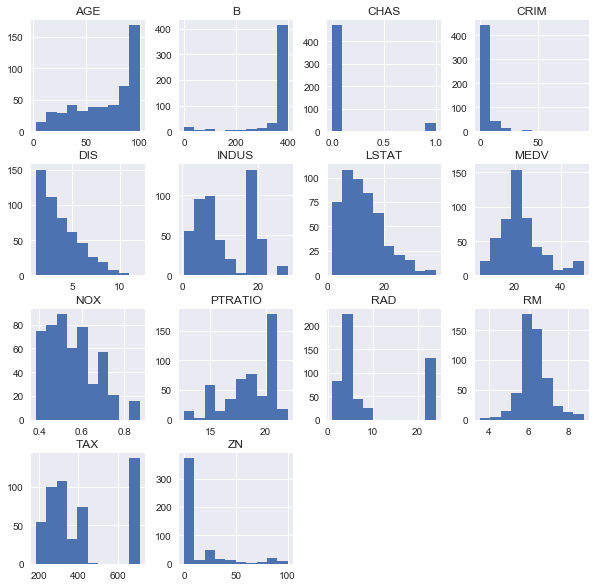

In [11]:
#Plot of the distribution of each column (e.g. histogram, bar plot, or box plot
ax = boston.hist(figsize=(10,10))

<Figure size 864x864 with 0 Axes>

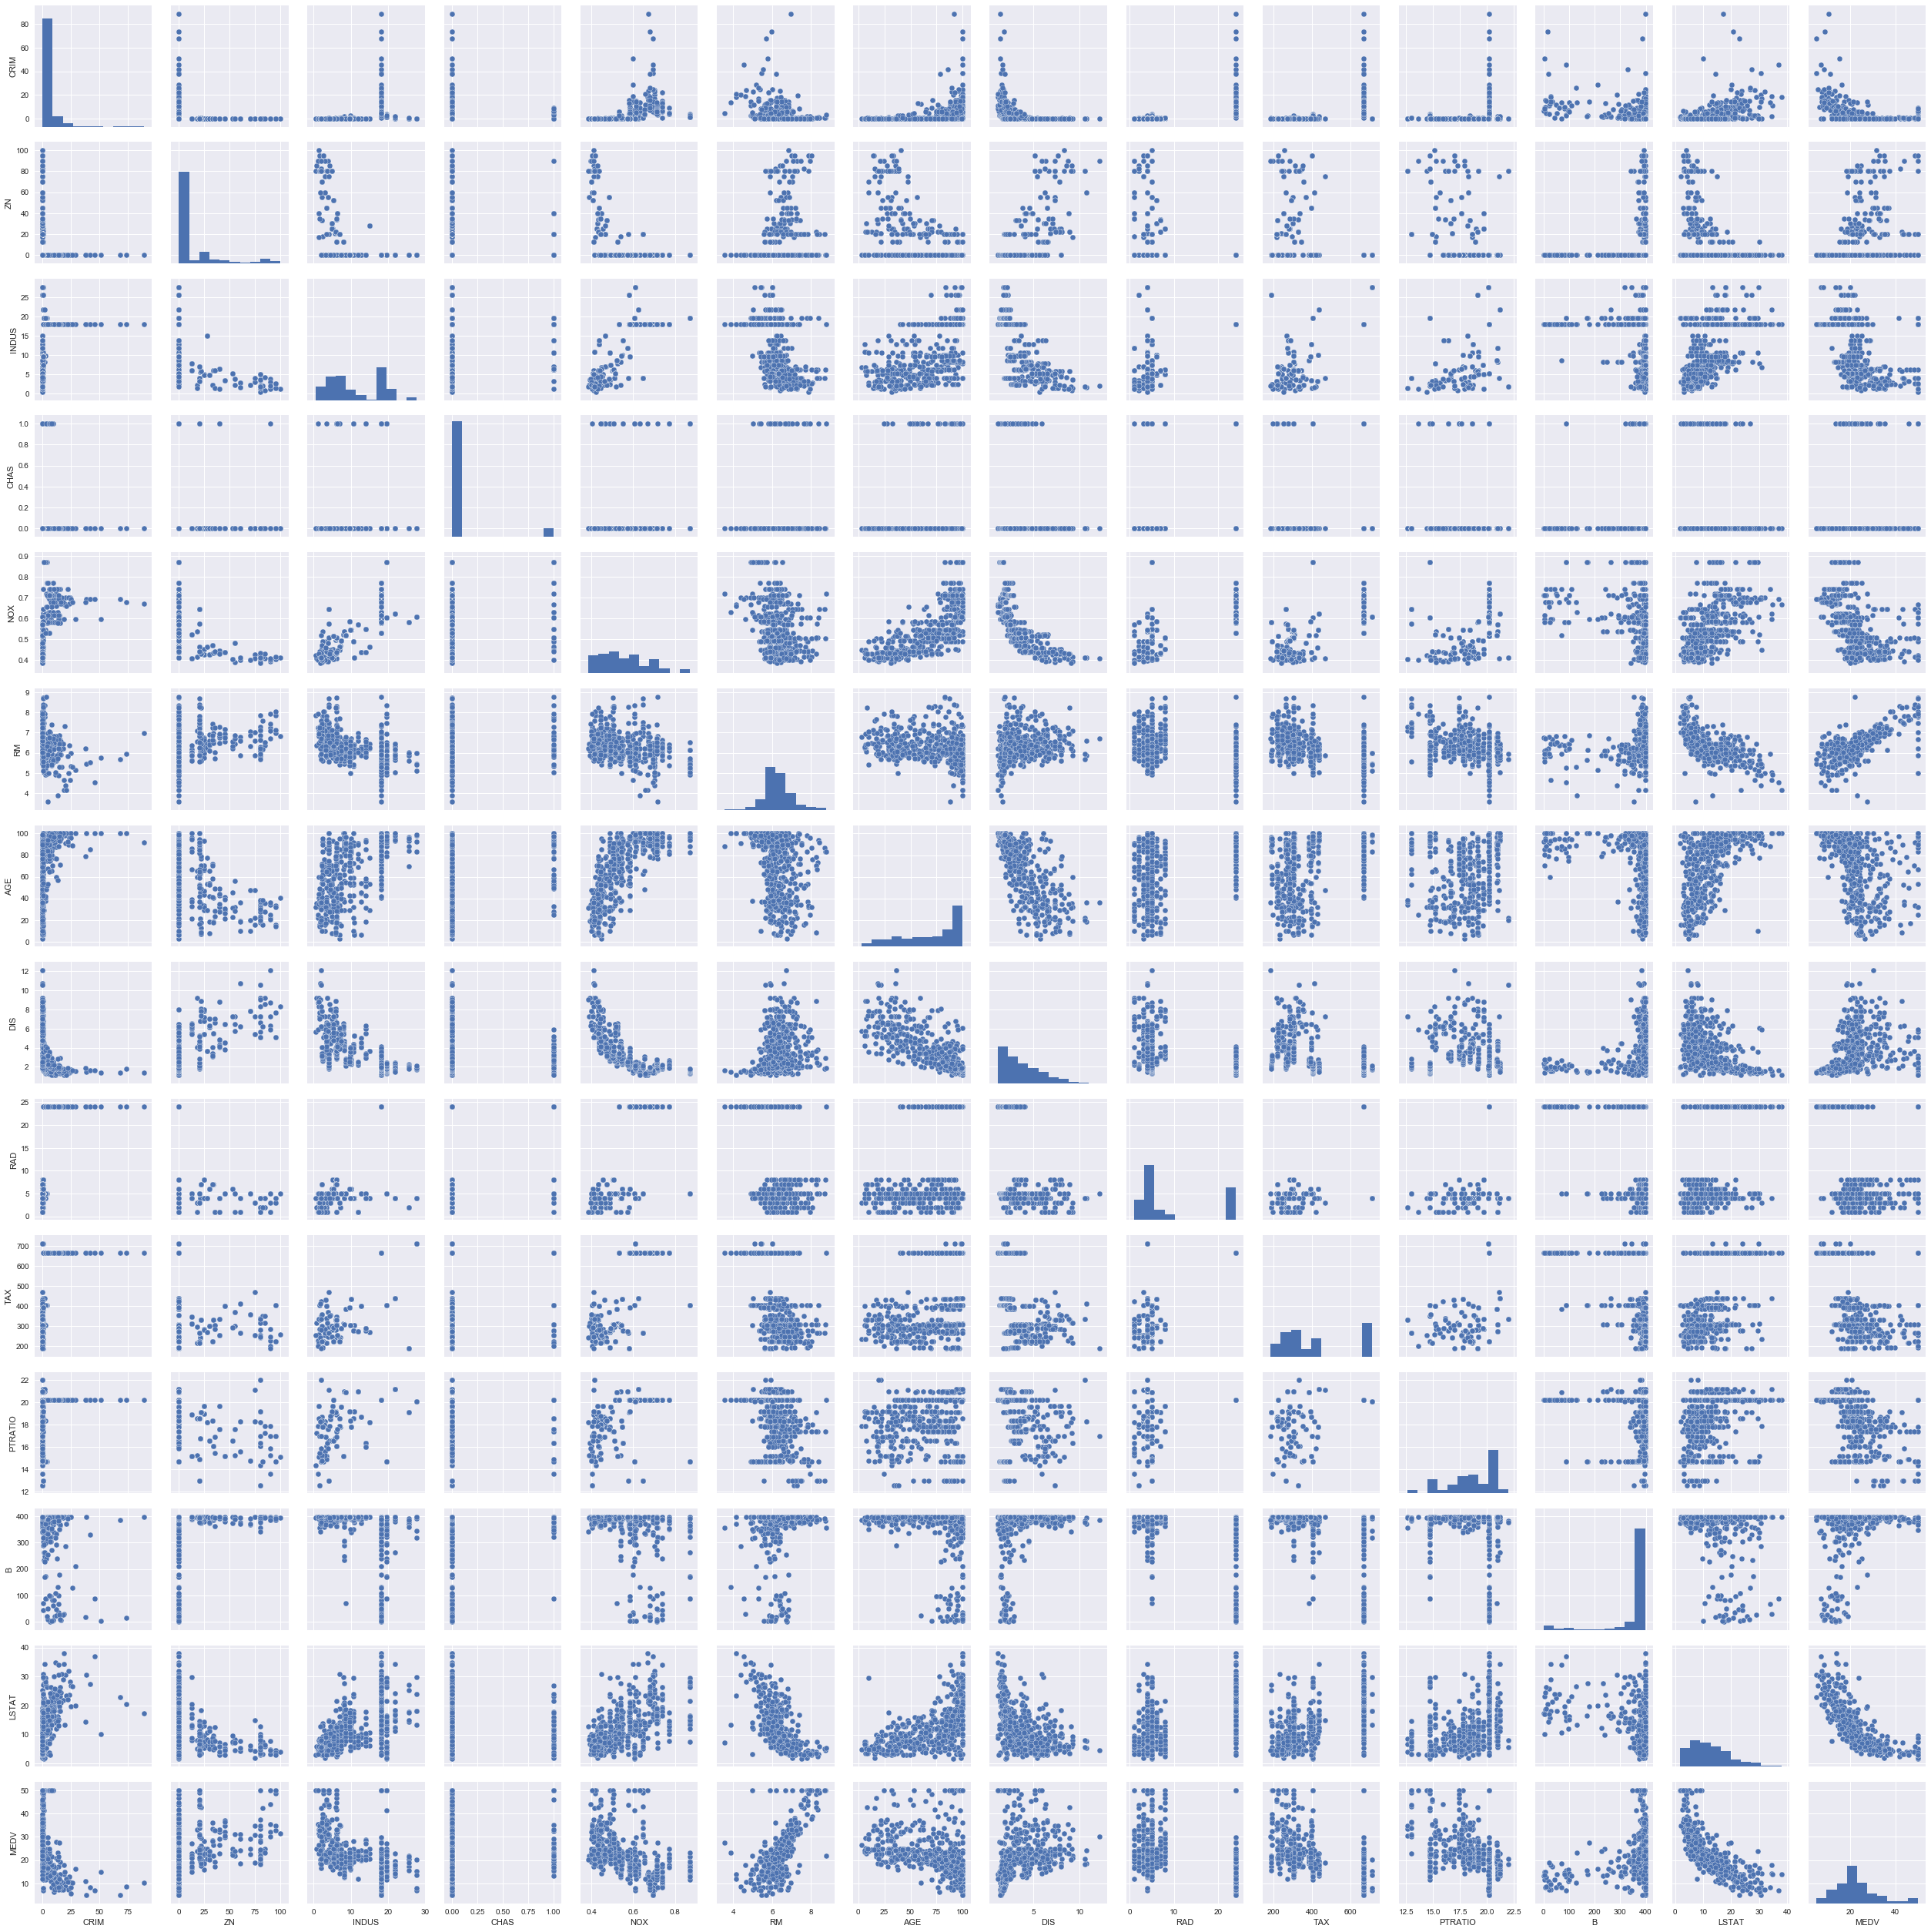

In [10]:
#Scatterplot of each column with median price
plt.figure(figsize=(12,12))
sns.pairplot(boston);

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [12]:
from sklearn import metrics

In [13]:
# Null model
null_pred =np.zeros(y.shape)
null_pred += np.array(np.mean(y))

null_mse = metrics.mean_squared_error(null_pred, y)
print('MSE of null model:'+ '{:.2f}'.format(null_mse))
#print('{:.2f}'.format(metrics.r2_score(pd.DataFrame(null_pred),y)))

MSE of null model:84.42


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3, random_state = 12345 )

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

print('Ave train MSE: '+ '{:.2f}'.format(metrics.mean_squared_error(y_train_pred,y_train)))
print('Train R2: ''{:.2f}'.format(metrics.r2_score(y_train_pred,y_train)))
print('Ave test MSE: ' + '{:.2f}'.format(metrics.mean_squared_error(y_test_pred, y_test)))
print('Test R2: ''{:.2f}'.format(metrics.r2_score(y_test_pred,y_test)))

Ave train MSE: 22.49
Train R2: 0.67
Ave test MSE: 21.75
Test R2: 0.64


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [15]:
# features
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=12345)

train_mse_values =[]
test_mse_values =[]
for train_indices, test_indices in kf.split(X, y):
    lr =LinearRegression()
    X_train =X.iloc[train_indices, :]
    y_train =y.iloc[train_indices]
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    train_mse = metrics.mean_squared_error(y_train, y_pred_train)
    test_mse = metrics.mean_squared_error(y_test,y_pred_test)
    
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    
print('Ave train MSE: '+ '{:.2f}'.format(np.mean(train_mse_values)))
print('Ave test MSE: '+'{:.2f}'.format(np.mean(test_mse_values)))


Ave train MSE: 21.82
Ave test MSE: 23.43


In [18]:
# Another way to do KFold
mse_values =[]
scores =[]
n =0


for train_index, test_index in kf.split(X,y):
    lr =LinearRegression().fit(X.iloc[train_index,:],y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    scores.append(lr.score(X, y))
    
    n += 1

print('Mean of MSE for all folds: '+ '{:.2f}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: '+'{:.2f}'.format(np.mean(scores)))

Mean of MSE for all folds: 23.43
Mean of R2 for all folds: 0.74


In [19]:
# A better way to calculate MSE
from sklearn.model_selection import cross_val_score

print('Ave test MSE: '+'{:.2f}'.format(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error'))))


Ave test MSE: 23.43


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

### The model performs better than null model. The result doesn't tell me much

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

### For train and test split model, the test MSE is a bit better and R squared is a bit worse, which is not too bad
### For kfold model, the test MST is worse than it performed on the the training set, which means the linear model is has a higer variance

- How much of a bias problem does your model appear to have? Why do you say that?

### The model has some bias because it is not pure relationship when we look at the plots

- How much of a variance problem does your model appear to have? Why do you say that?

### The model has some vairance because the test of MSE is higher than the training set of MSE, but it is not a big issue.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

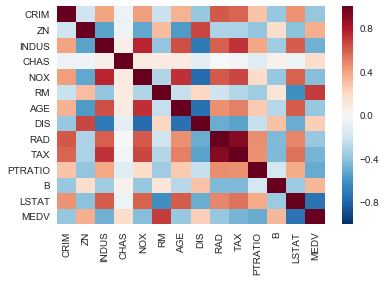

In [22]:
sns.heatmap(boston.corr(),
            vmin = -1,
            vmax = 1,
            );

C:\Users\nqi200\AppData\Local\Continuum\anaconda3\envs\geospatial36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features :  6


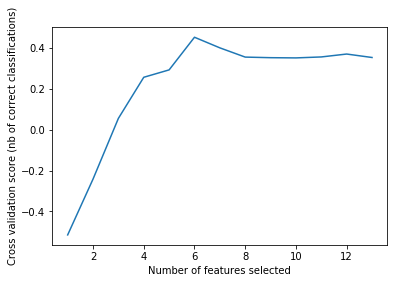

In [60]:
# Recusive feature elimiation with cross-validation
from sklearn.feature_selection import RFECV

lr = LinearRegression()
rfecv = RFECV(estimator=lr, step=1, cv=5)

rfecv.fit(X,y)

print("Optimal number of features : ", rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [61]:
import statsmodels.api as sm

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        12:41:29   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#Stepwise feature selection
feature_cols =['CRIM','ZN','CHAS','DIS','RAD','TAX','RM','LSTAT', 'B']
X_features = boston.loc[:, feature_cols]

print('Ave test MSE: '+'{:.2f}'.format(np.mean(-cross_val_score(lr, X_features, y, cv=kf, scoring='neg_mean_squared_error'))))

Ave test MSE: 25.96


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

In [63]:
# Transformation: 
# Choose LSTAT
from sklearn.preprocessing import PolynomialFeatures

X_poly = X.loc[:,'LSTAT']

for poly_degree in range (1,6):
    pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = pf.fit_transform(X)
    lr = LinearRegression()
    score = np.mean(-cross_val_score(lr, X_poly, y, cv=kf, scoring='neg_mean_squared_error'))
    print(poly_degree, score)
    
# 2nd degree of LSTAT could help model to reduce mse

1 23.429649027401673
2 14.966378092052304
3 50412592.905663155
4 232717.03277882637
5 158602.39761397062


# KNN Practice

In [64]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [65]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [67]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [68]:
iris.loc[:,'species_num']=  iris.loc[:,'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [69]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [70]:
#Data shape
iris.shape

(150, 6)

In [71]:
#Data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [72]:
#Count of null values by column
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [73]:
#Basic summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [74]:
#Number of unique values for each column
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

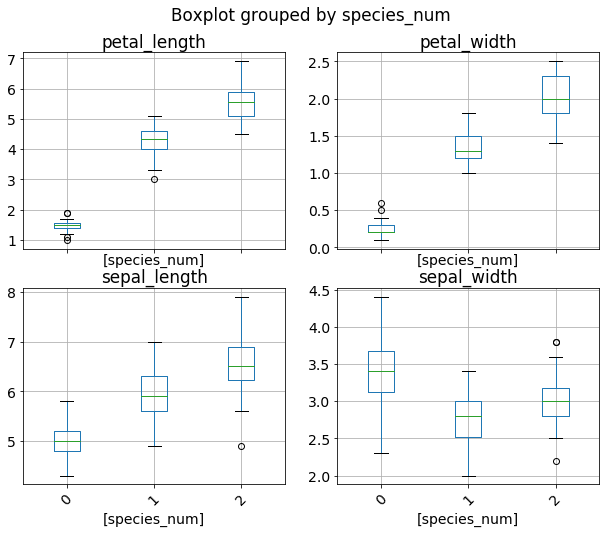

In [75]:
#Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species
warnings.simplefilter("ignore", UserWarning)
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True)
iris.boxplot(by='species_num', rot =45, ax =axes);

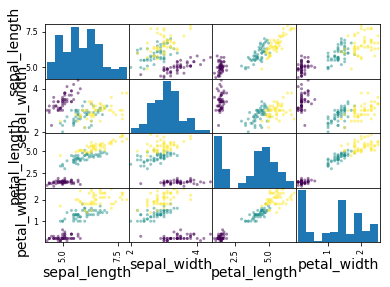

In [76]:
ax = pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c= iris.loc[:,'species_num']);

- Get the accuracy of a null model that simply predicts the most common species.

In [77]:
feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']

In [78]:
# Null model
most_common_value =y.value_counts().idxmax()
null_pred =np.zeros(y.shape) + most_common_value
print(null_pred)

print('Accuracy of null model :' +str(metrics.accuracy_score(null_pred, y)))

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
Accuracy of null model :0.3333333333333333


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

train_scores =[]
test_scores =[]

kf = KFold(n_splits=10, shuffle=True, random_state=12345)

for train_indices, test_indices in kf.split(X,y):
    
    knn = KNeighborsClassifier(n_neighbors=5)
    
    X_train = X.iloc[train_indices,:]
    X_test = X.iloc[test_indices,:]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    knn.fit(X_train_std,y_train)
    
    train_preds = knn.predict(X_train_std)
    test_preds =knn.predict(X_test_std)
    
    train_accuracy = metrics.accuracy_score(train_preds,y_train)
    test_accuracy = metrics.accuracy_score(test_preds,y_test)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

print('Ave train scores',sum(train_scores)/10)
print('Ave test scores',sum(test_scores)/10)


Ave train scores 0.9622222222222222
Ave test scores 0.9466666666666667


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

### The model performs better than the null model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

### The model performs a bit less worse than it perfomed on the training set. It tells us that there may be a vairance problem

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

### The model may has more of a variance issue becuase the accuracy score changes with new data coming iin

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

### See below. Increasing K cannot guranntee a better accuracy score

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [151]:
train_scores =[]
test_scores =[]

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    
    train_preds = knn.predict(X_train_std)
    test_preds =knn.predict(X_test_std)
    
    train_accuracy = metrics.accuracy_score(train_preds,y_train)
    test_accuracy = metrics.accuracy_score(test_preds,y_test)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

In [153]:
scores_df=pd.DataFrame({'k':range(1,100),'train_scores': train_scores, 'test_scores':test_scores})
scores_df.head()

,k,test_scores,train_scores
0,1,1.000000,1.000000
1,2,0.866667,0.970370
2,3,1.000000,0.948148
3,4,0.933333,0.955556
4,5,1.000000,0.948148


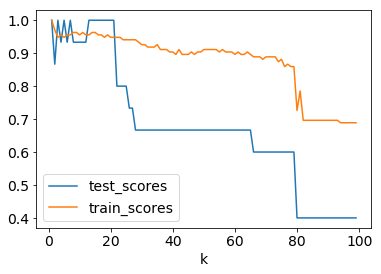

In [154]:
ax=scores_df.plot(x='k')

In [156]:
scores_df.sort_values('test_scores', ascending=False).head()

,k,test_scores,train_scores
0,1,1.0,1.000000
13,14,1.0,0.962963
2,3,1.0,0.948148
20,21,1.0,0.948148
4,5,1.0,0.948148


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

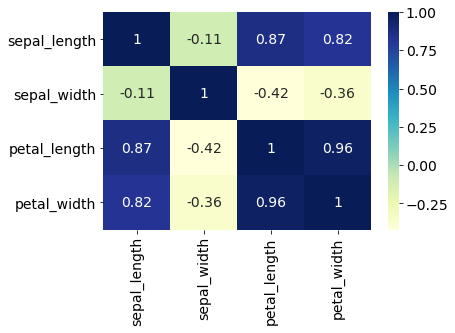

In [86]:
ax = sns.heatmap(iris.drop(['species','species_num'], axis=1).corr(), cmap ='YlGnBu', annot=True);

In [91]:
# Multiply two columns together 
iris.loc[:,'petal_area']= iris.loc[:,'petal_length']*iris.loc[:,'petal_width']

In [92]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.28


In [100]:
feature_cols = ['sepal_length','sepal_width','petal_area']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']

In [101]:
for train_indices, test_indices in kf.split(X,y):
    
    knn = KNeighborsClassifier(n_neighbors=5)
    
    X_train = X.iloc[train_indices,:]
    X_test = X.iloc[test_indices,:]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    knn.fit(X_train_std,y_train)
    
    train_preds = knn.predict(X_train_std)
    test_preds =knn.predict(X_test_std)
    
    train_accuracy = metrics.accuracy_score(train_preds,y_train)
    test_accuracy = metrics.accuracy_score(test_preds,y_test)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

print('Ave train scores',np.mean(train_scores))
print('Ave test scores',np.mean(test_scores))

Ave train scores 0.9616666666666667
Ave test scores 0.9466666666666667


## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [182]:
# First, format our data in a DataFrame
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [183]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model1 = smf.ols(formula=formulas['case1'], data=df)
result1 = model1.fit()

result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1221.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):          1.38e-321
Time:                        15:04:49   Log-Likelihood:                -1567.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

In [52]:
# Define features and target
boston = load_boston()
X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])


In [53]:
# Recursivve Feature Elimination: recursively remove attributes and build a model on remained attributes
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(lr, step=1)

fit = rfe.fit(X, y)
print('Num Features: ', fit.n_features_)
print('Selected Features: ', fit.support_)
print('Feature Ranking: ',fit.ranking_)

Num Features:  6
Selected Features:  [False False False  True  True  True False  True False False  True False
  True]
Feature Ranking:  [3 5 4 1 1 1 8 1 2 6 1 7 1]


C:\Users\nqi200\AppData\Local\Continuum\anaconda3\envs\geospatial36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Select features that was listed above based on the drop method

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

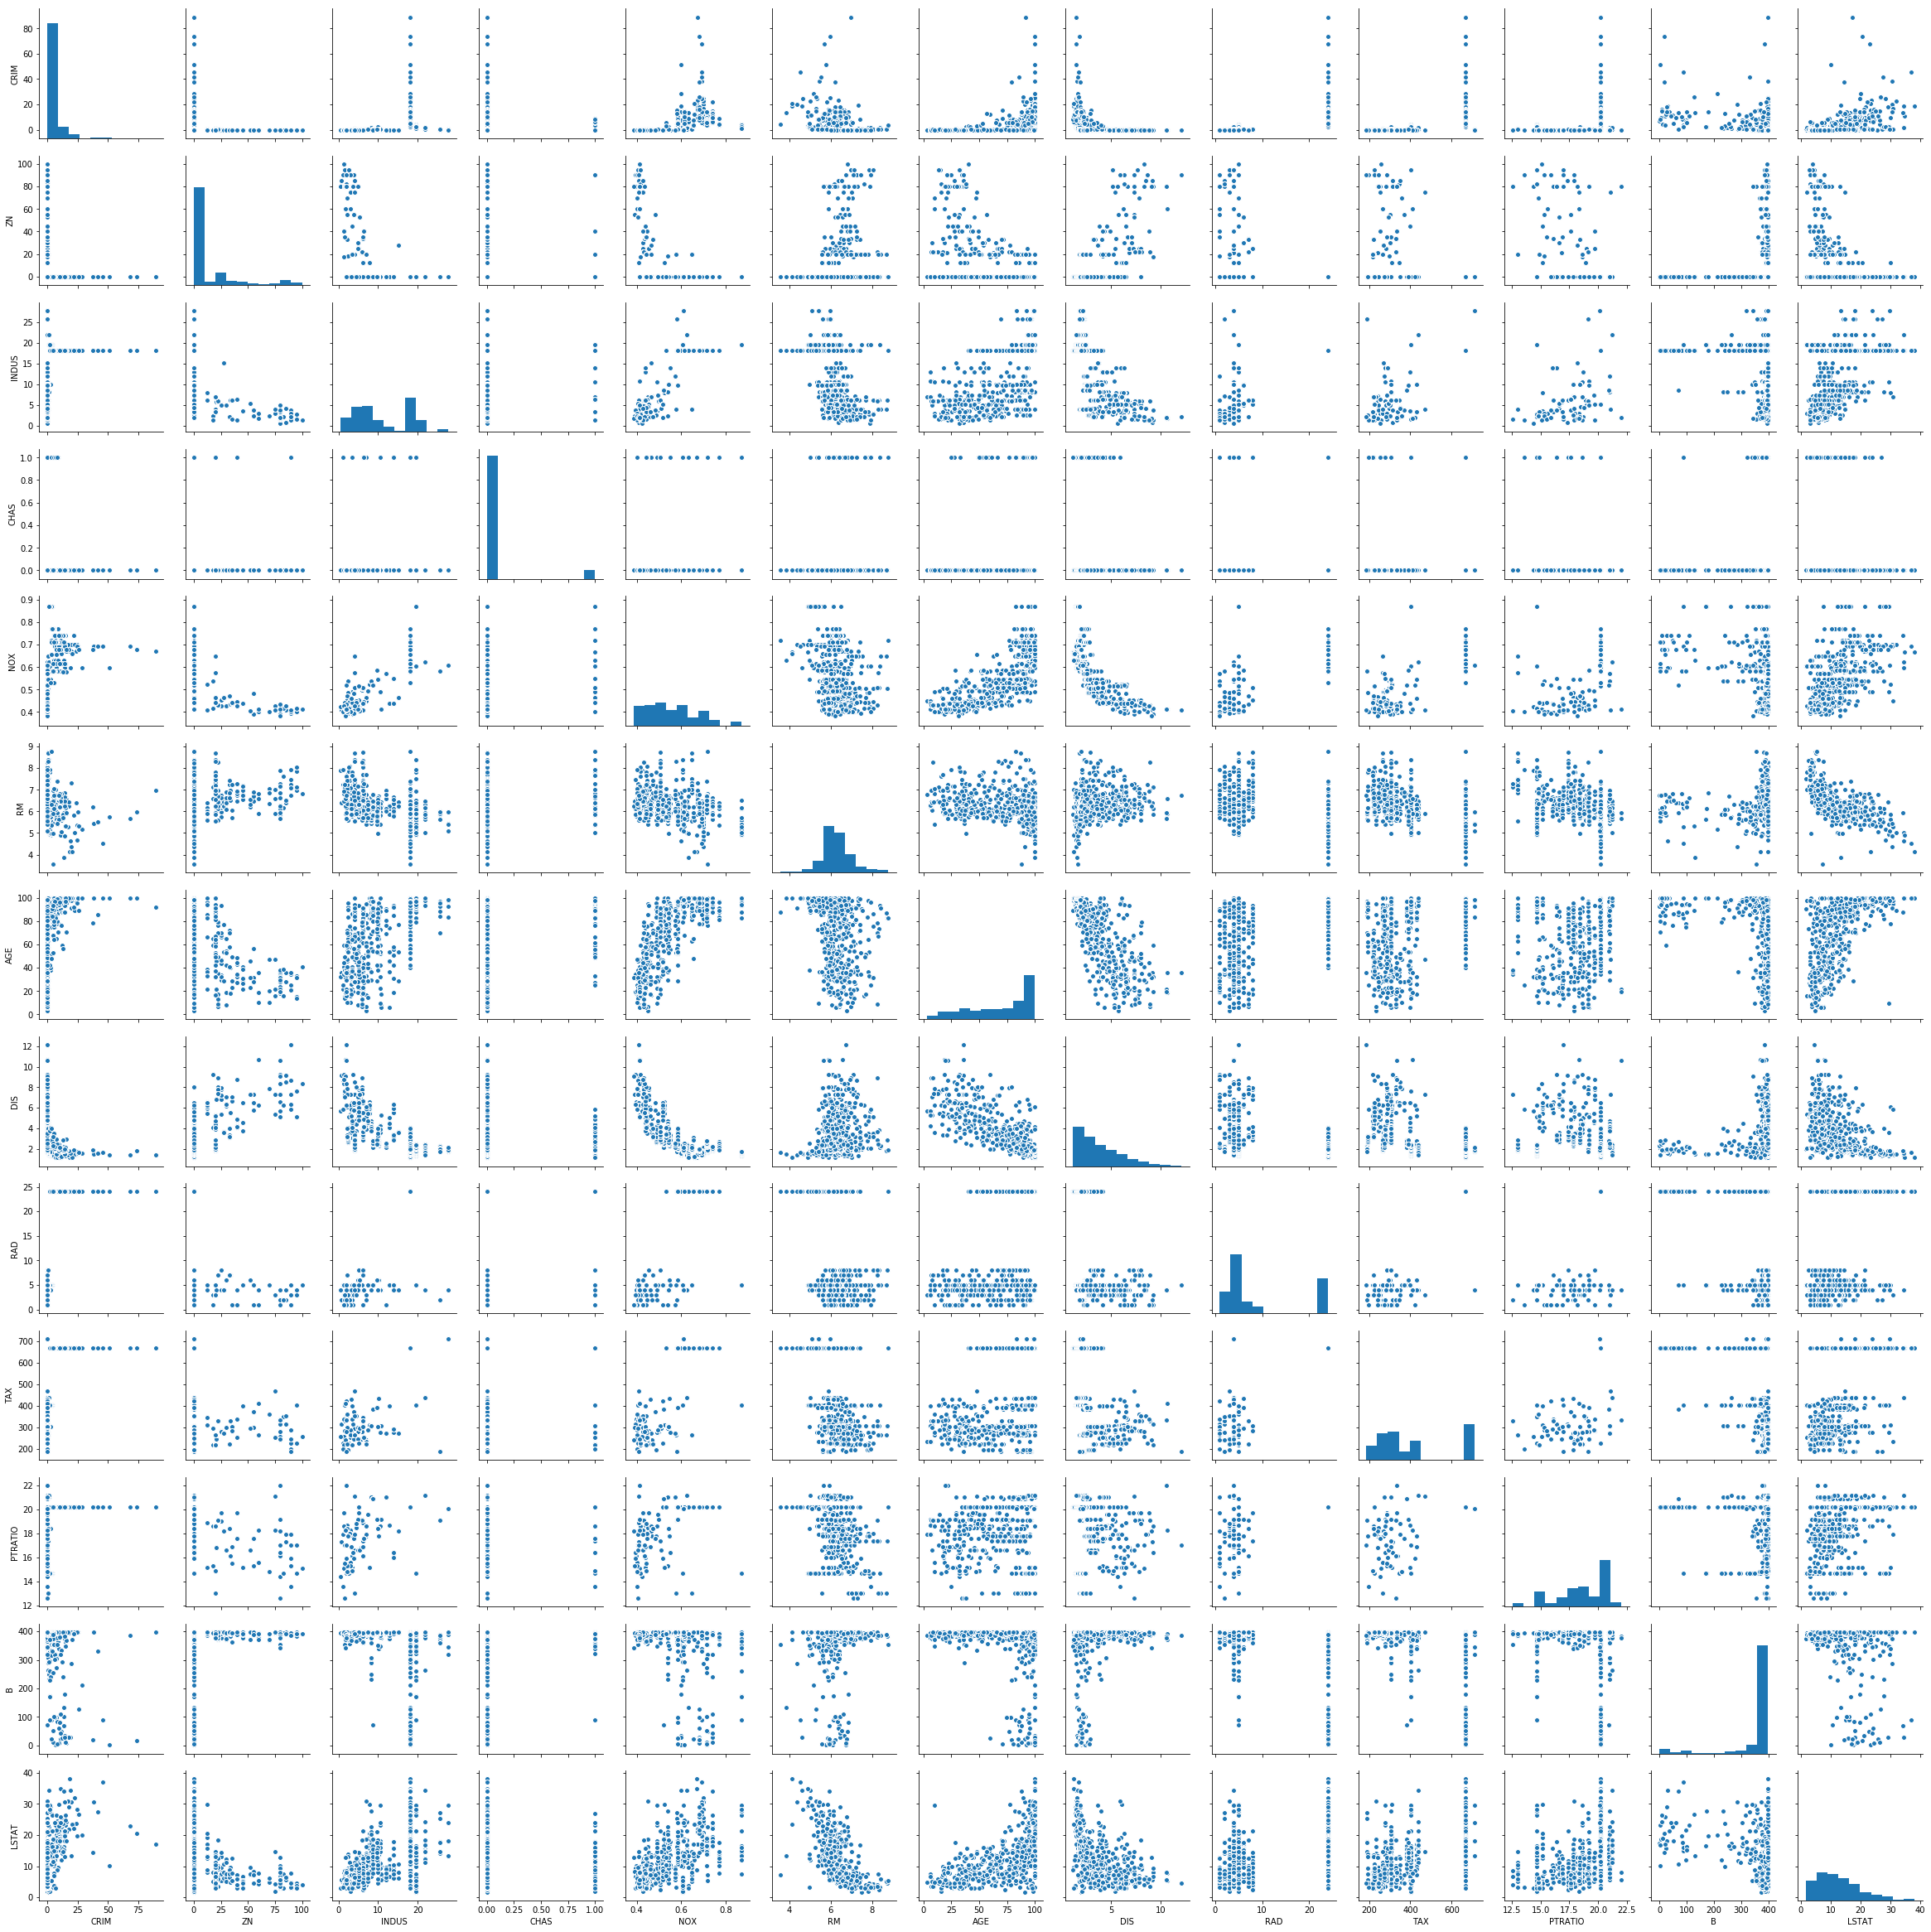

In [198]:
# Check out variable relations
import seaborn as sns
sns.pairplot(X);

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

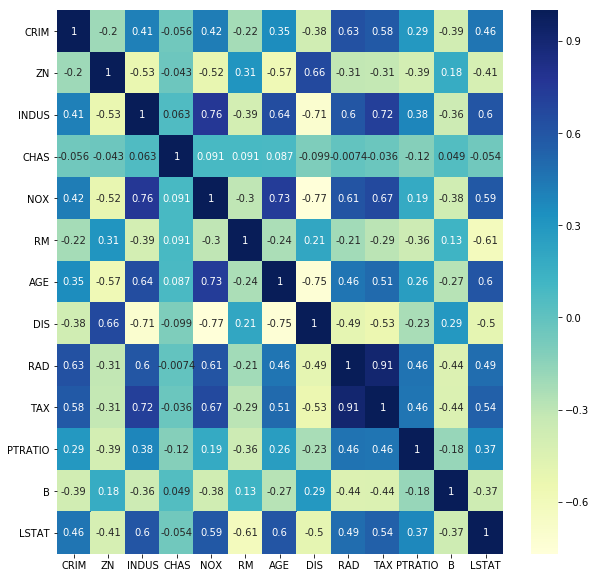

In [199]:
# Check out Pearson scores
print(X.corr())

plt.figure(figsize=(10,10))
ax = sns.heatmap(X.corr(), cmap ='YlGnBu', annot=True);

### Demo: Patsy

In [200]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [204]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [217]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


C:\Users\nqi200\AppData\Local\Continuum\anaconda3\envs\geospatial36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  - :term:`CV splitter`,


In [213]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.37847822053225044


In [216]:
# Add an intercept term
y, X = patsy.dmatrices("MEDV ~ AGE+ RM + AGE*RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.4850866693289613


C:\Users\nqi200\AppData\Local\Continuum\anaconda3\envs\geospatial36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  - :term:`CV splitter`,
